# Problem 4: Gaussian Mixture Model with EM algorithm 
### [20 points]
![gmm1](gmm1.png)

![gmm2](gmm2.png)

![gmm3](gmm3.png)

![gmm4](gmm4.png)

![gmm5](gmm5.png)

## EM Algorithm for GMM
![e_step](e_step.png)

![m_step](m_step.png)

## Task:

Let us load the iris dataset and carry out initial Exploratory Data Analysis

In [5]:
## Loading the required libraries 
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
iris = load_iris()


In [6]:
## Lets see what the data looks like
data=pd.DataFrame(iris['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
print(data.head())
data.describe()

   Petal length  Petal Width  Sepal Length  Sepal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


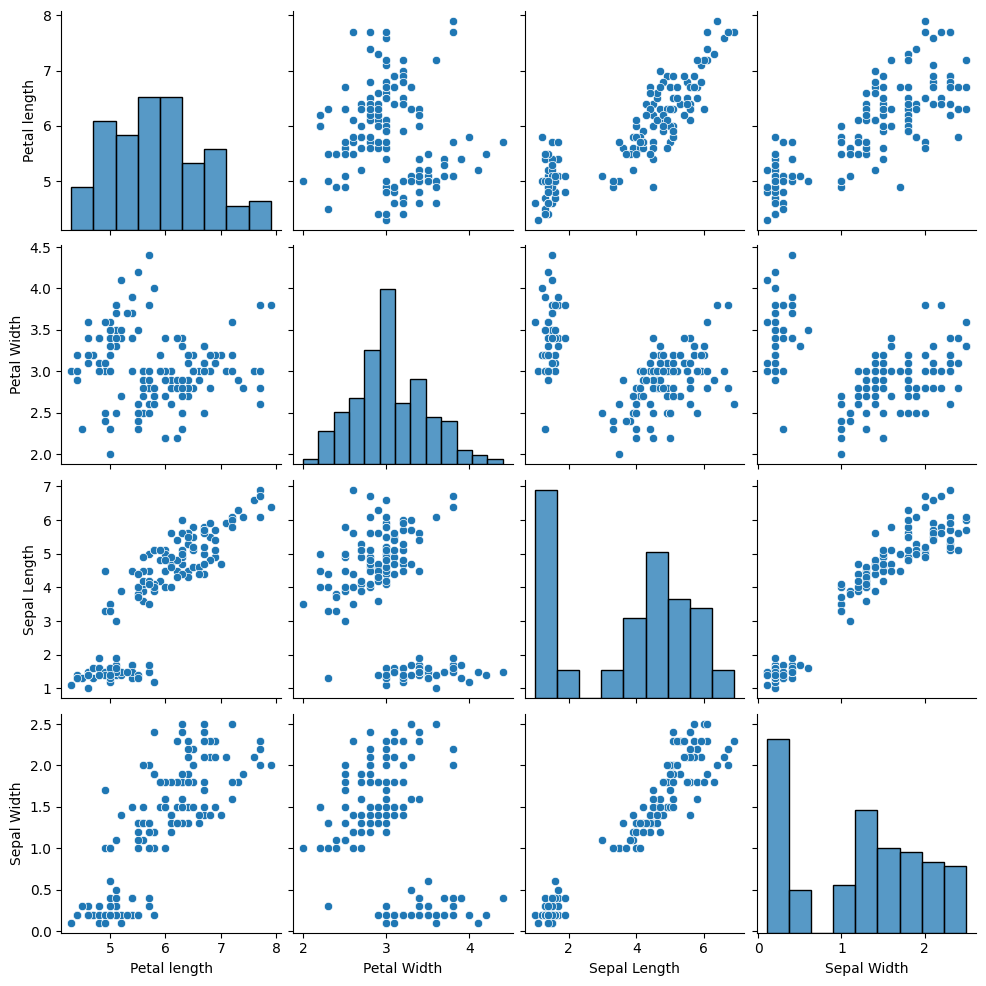

In [7]:
## Explore the relationship between variables
sns.pairplot(data)

### Let us load the data from the Dataset and use GMM to find clusters in this data

In [9]:
X = iris.data

### Complete the GMM class below by refering to theory above

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):


    def initialize(self, X):


    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant

    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant

    def fit(self, X):

            
    def predict_proba(self, X):

    
    def predict(self, X):


### Lets Evaluate the Model

In [11]:
np.random.seed(42)
gmm = GMM(k=3, max_iter=10)
gmm.fit(X)

In [12]:
permutation = np.array([
    mode(iris.target[gmm.predict(X) == i],keepdims=True).mode.item() 
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(X)]
print(np.mean(iris.target == permuted_prediction))
confusion_matrix(iris.target, permuted_prediction)


0.96


array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  0, 50]])

### Lets visualize the predicted clusters

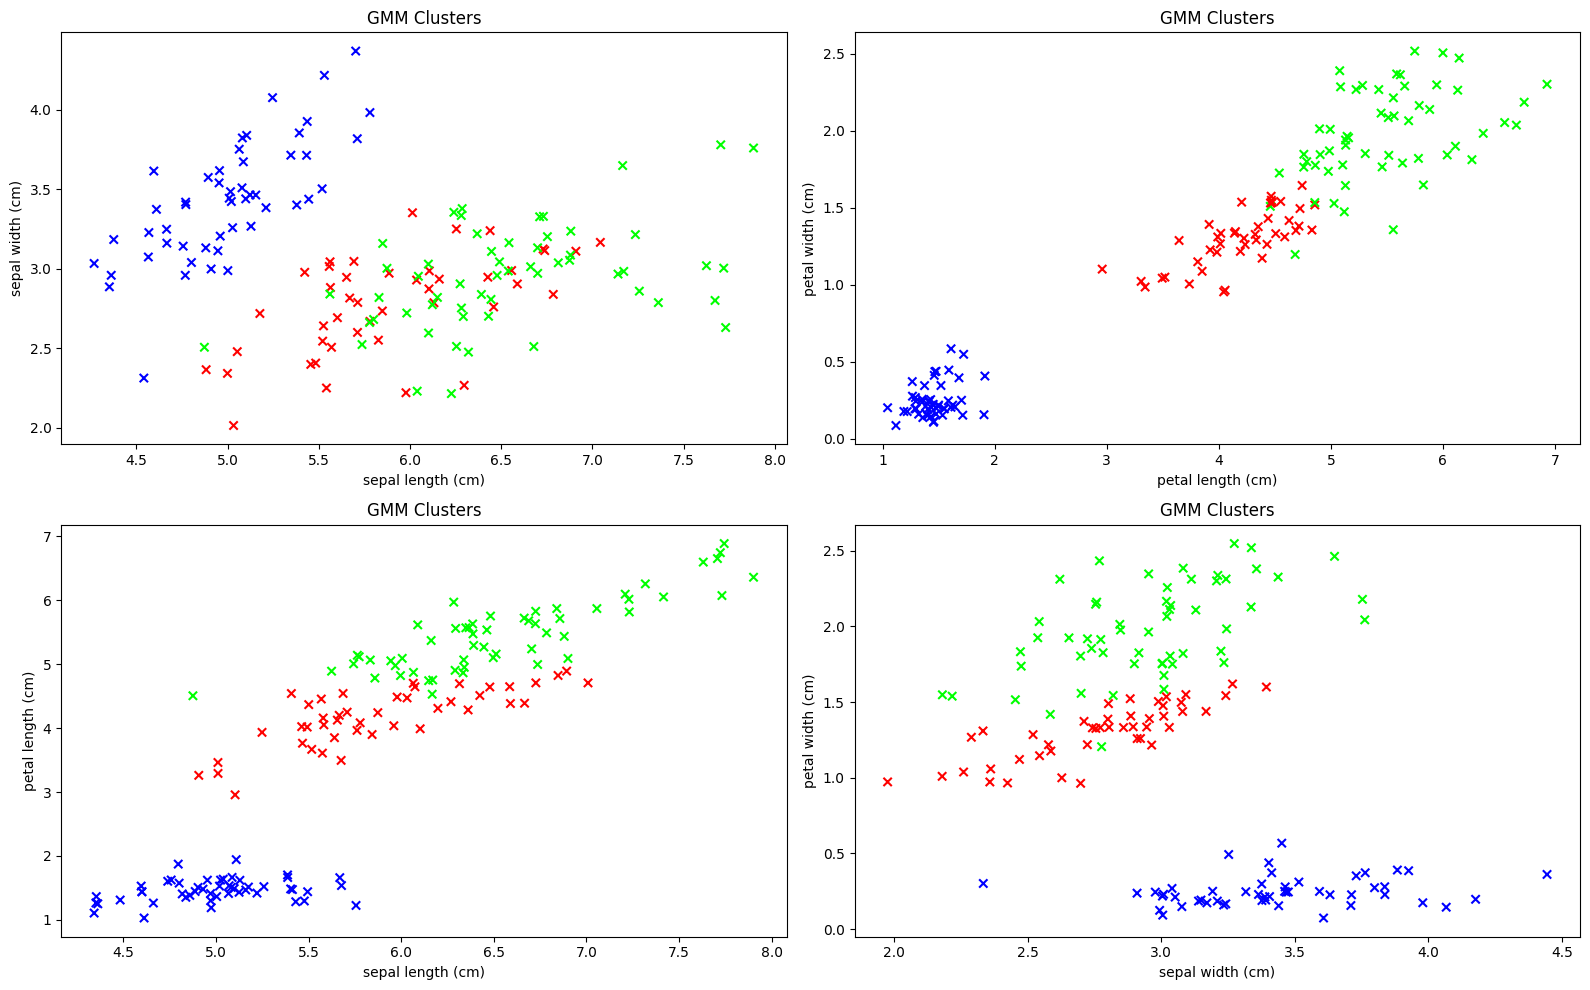

In [13]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('GMM Clusters')
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(
            jitter(X[:, x_axis]), 
            jitter(X[:, y_axis]), 
            c=clusters, 
            cmap=plt.colormaps.get_cmap('brg'),
            marker='x')
    plt.tight_layout()

plot_axis_pairs(
    X=X,
    axis_pairs=[ 
        (0,1), (2,3), 
        (0,2), (1,3) ],
    clusters=permuted_prediction,
    classes=iris.target)

# Problem 5: Neural Networks 
### [20 points]
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and improve continuously. Thus, artificial neural networks attempt to solve complicated problems, like summarizing documents or recognizing faces, with greater accuracy.

The forward process of a neural network involves taking an input, passing it through the layers of the network, and producing an output. This is also referred to as the "feedforward" process. In this process, the input is multiplied by the weights of the connections between the neurons in the network, and then a non-linear activation function is applied to the result. This is repeated for each layer in the network until the final output is produced.

The backward process, also known as backpropagation, is the process of updating the weights of the connections in the network during training. This is done by computing the gradient of the error between the predicted output and the actual output with respect to the weights in the network. The gradient is then used to update the weights in the opposite direction of the gradient to minimize the error. This process is repeated for each layer in the network, propagating the error backwards from the output layer to the input layer.

The forward and backward processes work together in a neural network to train the network to make accurate predictions on new, unseen data.

![nn](nn.png)

Activation functions are an essential component of neural networks as they introduce non-linearity into the output of each neuron in the network. The purpose of an activation function is to determine the output of a neuron given its input signal, which is a weighted sum of the inputs from the previous layer.

Without an activation function, the output of each neuron would be a linear combination of its inputs, which would result in a neural network that can only model linear relationships between inputs and outputs. However, real-world data is rarely linear, and most problems require non-linear functions to accurately model the data.

Activation functions introduce non-linearities into the neural network by introducing complex transformations between the inputs and outputs of neurons. This allows neural networks to learn complex, non-linear patterns in the data, which is necessary for solving a wide range of machine learning problems.

Criterion loss, also known as loss function or objective function, is a mathematical function that is used to measure the difference between the predicted output of a neural network and the actual output, also known as the ground truth. The purpose of a loss function is to provide a quantitative measure of how well the network is performing on a given task.

During training, the neural network tries to minimize the value of the loss function by adjusting the weights of its connections. This is done through the process of backpropagation, which computes the gradient of the loss function with respect to the weights in the network and updates them in the opposite direction to minimize the loss.


## Problem 5a: Activation Function

Here, we will introduce to you a few popular activation functions and how to implement them!

The primary purpose of having nonlinear components in the neural network (fNN ) is to allow it to
approximate nonlinear functions. Without activation functions, fNN will always be linear, no matter
how deep it is. The reason is that A ·W + b is a linear function, and a linear function of a linear function is
also linear.


Popular choices of activation functions are Sigmoid, as well as ReLU and Tanh:

![activation_graphs](activation_graphs.png)

In this section, your task is to implement the Activation class:
Class attributes:
* Activation functions have no trainable parameters.
* Variables stored during forward-propagation to compute derivatives during back-propagation: layer output A.

Class methods:
* forward: forward method takes in a batch of data Z of shape N ×C (representing N samples
where each sample has C features), and applies the activation function to each element of Z to
compute output A of shape N ×C.

* backward: backward method calculates and returns dAdZ, how changes in pre-activation features
Z affect post-activation values A. It is used to enable downstream computation, as seen in
subsequent sections.

Activation Function Components:
![activation_comp](activation_comp.png)


Note: By convention in this class, Z is the output of a linear layer, and A is the input of a linear layer. Here,
Z is the output from the previous linear layer and A is the input to the next linear layer, i.e. let fl be the
activation function of layer l,
![activation_img](activation_img.png)


### Sigmoid

#### Sigmoid Forward
During forward propagation, pre-activation features Z are passed to the activation function Sigmoid to
calculate their post-activation values A.
![sigmoid_f](sigmoid_f.png)

#### Sigmoid Backward
Backward propagation helps us understand how changes in pre-activation features Z affect post-activation
values A.
![sigmoid_b](sigmoid_b.png)

### Tanh

#### Tanh Forward
![tanh_f](tanh_f.png)

#### Tanh Backward
Fill in the blank in the equation below. Represent the final result in terms of A, similar to Sigmoid backward
equation in the previous section.
![tanh_b](tanh_b.png)

### RELU

#### RELU Forward
Recall the equation of ReLU and fill in the blank below:
![relu_f](relu_f.png)
Hint: You might find the graph of ReLU helpful

#### RELU Backward
Complete the piece-wise function for relu.backward:

![relu_b](relu_b.png)

In [ ]:
import numpy as np


class Identity:

    def forward(self, Z):

        self.A = Z

        return self.A

    def backward(self):

        dAdZ = np.ones(self.A.shape, dtype="f")

        return dAdZ


class Sigmoid:
    """
    On same lines as above:
    Define 'forward' function
    Define 'backward' function
    Read the writeup for further details on Sigmoid.
    """
    def forward(self,Z):

        return self.A
    def backward(self):

        return dAdZ


class Tanh:
    """
    On same lines as above:
    Define 'forward' function
    Define 'backward' function
    Read the writeup for further details on Tanh.
    """
    def forward(self,Z):

        return self.A
    def backward(self):

        return dAdZ
    


class ReLU:
    """
    On same lines as above:
    Define 'forward' function
    Define 'backward' function
    Read the writeup for further details on ReLU.
    """
    def forward(self,Z):

        return self.A
    def backward(self):

        return dAdZ

## Problem 5b: Criterion - Loss Functions
Much as you did for activation functions you will now program some simple loss functions. Different loss
functions may become useful depending on the type of neural network and type of data you are using. Here
we will program Mean Squared Error Loss MSE and Cross Entropy Loss. It is important to know how
these are calculated, and how they will be used to update your network. As before we will provide the
formulas, and know that each of these functions can be done in less than 10 lines of code, so if your code
begins to get more complex than that you may be overthinking the problem.


In this section, your task is to implement the forward and backward attribute functions of the Loss class
in file loss.py:


Class attributes:
- Stores model prediction A to compute back-propagation.
- Stores desired output Y stored to compute back-propagation.


Class methods:
- forward: forward method takes in model prediction A and desired output Y of the same shape
to calculate and return a loss value L. The loss value is a scalar quantity used to quantify the
mismatch between the network output and the desired output.
- backward: backward method calculates and returns dLdA, how changes in model outputs A affect
loss L. It is used to enable downstream computation, as seen in previous sections.

![loss_table](loss_table.png)
![loss](loss.png)


### MSE Loss 
MSE stands for Mean Squred Error, and is often used to quantify the prediction error for regression problems.
Regression is a problem of predicting a real-valued label given an unlabeled example. Estimating house
price based on features such as area, location, the number of bedrooms and so on is a classic regression
problem

#### MSE Loss Forward Equation
We first calculate the squared error SE between the model outputs A and the ground-truth values Y:
![mse_f](mse_f.png)

#### MSE Loss Backward Equation
![mse_b](mse_b.png)


### Cross-Entropy Loss
Cross-entropy loss if one of the most commonly used loss function for probability-based classification prob-
lems. In this course, most of the part 2 homework problems involve classification problems, hence you will
use this loss function very often.

#### Cross-Entropy Loss Forward Equation
Cross-Entropy Loss Forward Equation
Firstly, we use softmax function to transform the raw model outputs A into a probability distribution
consisting of C classes proportional to the exponentials of the input numbers.
ιN,ιC are column vectors of size N and C which contain all 1s.
![cel_f_1](cel_f_1.png)
Now, each row of A represents the model’s prediction of the probability distribution while each row of Y
represents target distribution of an input in the batch.
Then, we calculate the cross-entropy H(A,Y) of the distribution Ai relative to the target distribution Yi
for i = 1,...,N:
![cel_f_2](cel_f_2.png)
Remember that the output of a loss function is a scalar, but now we have a column matrix of size N. To
transform it into a scalar, we can either use the sum or mean of all cross-entropy.
Here, we choose to use the mean cross-entropy as the cross-entrpy loss as that is the default for PyTorch as
well:
![cel_f_3](cel_f_3.png)


#### Cross-Entropy Loss Backward Equation
![cel_b](cel_b.png)

In [ ]:
import numpy as np


class MSELoss:

    def forward(self, A, Y):
        """
        Calculate the Mean Squared error
        :param A: Output of the model of shape (N, C)
        :param Y: Ground-truth values of shape (N, C)
        :Return: MSE Loss(scalar)

        """

        return mse

    def backward(self):


        return dLdA


class CrossEntropyLoss:

    def forward(self, A, Y):
        """
        Calculate the Cross Entropy Loss
        :param A: Output of the model of shape (N, C)
        :param Y: Ground-truth values of shape (N, C)
        :Return: CrossEntropyLoss(scalar)

        Refer the the writeup to determine the shapes of all the variables.
        Use dtype ='f' whenever initializing with np.zeros()
        """


    def backward(self):


        return dLdA
